# Data Processing

In [24]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import regex as re
import re
import regex
from sklearn.preprocessing import MinMaxScaler         #scaling & normalization
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
from scipy.interpolate import make_interp_spline
# from sklearn.preprocessing import OrdinalEncoder

In [25]:
# (2) Reading json file
with open('trending.json','r',encoding='UTF-8') as load_f:
    load_dict=json.load(load_f)
    
# (3) Selecting the 'collector' list as main dataset
load_dict=load_dict['collector']
# load_dict[1]

In [26]:
# (4) Appending data in json to dataframe
df=pd.DataFrame(columns=load_dict[0].keys())
for dict in load_dict:
    df=df.append(dict,ignore_index=True)

# Before we deal with dictionaries nested in columns, we have noticed 
# that there will be two columns named 'id' in dataset. To avoid 
# potential information loss, we rename one of those columns to 'Id'.
# df.rename(columns={'id':'Id'},inplace=True)

In [27]:
# (5) Dividing the column containing dictionaries into new columns.
def dict_to_column(df,columns):
    for i in df[columns][0].keys():
        df[re.sub('Meta','',columns)+'_'+i]=[j[i] for j in df[columns]]
    df.drop(columns,axis=1,inplace=True)
    return df

def dict_parse(df):
    for i in df.keys():
        if type(df[i][0])==type({}) and df[i][0]!={}:
            df=dict_to_column(df,i)
    return df
        
df=dict_parse(df)

In [28]:
import time
df['createTime']=[time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(i)) for i in df['createTime']]

# Check the number of celebrities from wikipedia

In [29]:
df_trending = pd.read_csv('trending.csv')
df_top50_name = pd.read_csv('celebrity_list.csv')
df_top50 = df_top50_name.rename(columns={'Username': 'authorMeta/name'})
df_top50

df_name = df_trending[['id','authorMeta/name']]
df_name['id'].apply(pd.to_numeric)
df_video_length = df[['id','video_duration']]
df_video_length = df_video_length.apply(pd.to_numeric)
df_name_info = pd.merge(df_video_length,df_name, how="inner")
df_cele = pd.merge(df_name_info,df_top50, how="inner")
df_cele
#https://en.wikipedia.org/wiki/List_of_most-followed_TikTok_accounts

,id,video_duration,authorMeta/name,yes_or_no
0,6906845094473649410,53,kylethomas,1.0
1,6905530005711768833,15,kylethomas,1.0
2,6904976916437044482,59,kylethomas,1.0
3,6906885936366259457,25,kylethomas,1.0
4,6908292605101051137,15,youneszarou,1.0
5,6895082457968725249,7,thekiryalife,1.0
6,6907966191059356929,25,thekiryalife,1.0
7,6885766692627107077,12,spencerx,1.0
8,6882769301615496450,27,kallmekris,1.0
9,6894081763379924229,9,billieeilish,1.0


# Plot of post engagement vs video length

In [32]:
# (1) Data Processing
##to numeric
df['diggCount'] = df['diggCount'].apply(pd.to_numeric)
df['shareCount'] = df['shareCount'].apply(pd.to_numeric)
df['playCount'] = df['playCount'].apply(pd.to_numeric)
df['commentCount'] = df['commentCount'].apply(pd.to_numeric)
df['video_duration'] = df['video_duration'].apply(pd.to_numeric)
df_engage = df[['diggCount','shareCount','playCount','commentCount','video_duration']]
##remove outliers
from scipy import stats
df_engage_clean = df_engage[(np.abs(stats.zscore(df_engage)) < 3).all(axis=1)]
##remove other top 10 diggcount video(too much bias)
df_engage_clean2_1 = df_engage_clean.sort_values(by='video_duration', ascending=False)
df_engage_clean2 = df_engage_clean2_1.sort_values('diggCount', ascending=False)
df_engage_clean2.drop(index=61, columns=None, inplace=True)
df_engage_clean2.drop(index=430, columns=None, inplace=True)
df_engage_clean2.drop(index=244, columns=None, inplace=True)
df_engage_clean2.drop(index=2, columns=None, inplace=True)
df_engage_clean2.drop(index=129, columns=None, inplace=True)
df_engage_clean2.drop(index=95, columns=None, inplace=True)
df_engage_clean2.drop(index=194, columns=None, inplace=True)
df_engage_clean2.drop(index=375, columns=None, inplace=True)
df_engage_clean2.drop(index=529, columns=None, inplace=True)
df_engage_clean2.drop(index=560, columns=None, inplace=True)

# (2) seprate the groups for line plot
##set bin
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
group_names = ['1','2','3','4','5','6','7','8','9','10','11','12']
df_engage_clean2['group'] = pd.cut(df_engage_clean2['video_duration'], bins, labels=group_names)
##get every average of groups
g1 = df_engage_clean2[df_engage_clean2['group']=='1'].mean().to_frame().T
g2 = df_engage_clean2[df_engage_clean2['group']=='2'].mean().to_frame().T
g3 = df_engage_clean2[df_engage_clean2['group']=='3'].mean().to_frame().T
g4 = df_engage_clean2[df_engage_clean2['group']=='4'].mean().to_frame().T
g5 = df_engage_clean2[df_engage_clean2['group']=='5'].mean().to_frame().T
g6 = df_engage_clean2[df_engage_clean2['group']=='6'].mean().to_frame().T
g7 = df_engage_clean2[df_engage_clean2['group']=='7'].mean().to_frame().T
g8 = df_engage_clean2[df_engage_clean2['group']=='8'].mean().to_frame().T
g9 = df_engage_clean2[df_engage_clean2['group']=='9'].mean().to_frame().T
g10 = df_engage_clean2[df_engage_clean2['group']=='10'].mean().to_frame().T
g11 = df_engage_clean2[df_engage_clean2['group']=='11'].mean().to_frame().T
g12 = df_engage_clean2[df_engage_clean2['group']=='12'].mean().to_frame().T
## all together
df_mean = pd.concat([g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12])
## Normalization so can plot and see trend
scaler = MinMaxScaler()
df_mean[['diggCount', 'shareCount', 'playCount', 'commentCount','video_duration']] = scaler.fit_transform(df_mean[['diggCount', 'shareCount', 'playCount', 'commentCount','video_duration']])
df_mean
##reset index
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12])
df_mean.set_index([s])

,diggCount,shareCount,playCount,commentCount,video_duration
1,0.356753,0.838125,0.481277,0.356195,0.000000
2,0.204747,0.378873,0.378449,0.082571,0.066067
3,0.352098,0.457273,0.531282,0.388944,0.161756
4,0.677729,1.000000,0.854301,1.000000,0.242867
5,1.000000,0.863183,1.000000,0.656771,0.332776
6,0.802200,0.478407,0.546287,0.703752,0.440614
7,0.024918,0.151477,0.000000,0.020754,0.526111
8,0.735793,0.294680,0.399978,0.365872,0.615022
9,0.000000,0.000000,0.023584,0.000000,0.703264
10,0.116485,0.175064,0.149173,0.668323,0.796003


In [33]:
# (2) get every video have created of groups for bar plot
l1 = df_engage_clean2[df_engage_clean2['group']=='1'].shape[0]
l2 = df_engage_clean2[df_engage_clean2['group']=='2'].shape[0]
l3 = df_engage_clean2[df_engage_clean2['group']=='3'].shape[0]
l4 = df_engage_clean2[df_engage_clean2['group']=='4'].shape[0]
l5 = df_engage_clean2[df_engage_clean2['group']=='5'].shape[0]
l6 = df_engage_clean2[df_engage_clean2['group']=='6'].shape[0]
l7 = df_engage_clean2[df_engage_clean2['group']=='7'].shape[0]
l8 = df_engage_clean2[df_engage_clean2['group']=='8'].shape[0]
l9 = df_engage_clean2[df_engage_clean2['group']=='9'].shape[0]
l10 = df_engage_clean2[df_engage_clean2['group']=='10'].shape[0]
l11 = df_engage_clean2[df_engage_clean2['group']=='11'].shape[0]
l12 = df_engage_clean2[df_engage_clean2['group']=='12'].shape[0]

group_count = [l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12]
group_count

[14, 251, 370, 83, 58, 47, 28, 14, 22, 11, 26, 51]

In [40]:
#the highest count of video group
l3

370

# Plotting out

No handles with labels found to put in legend.


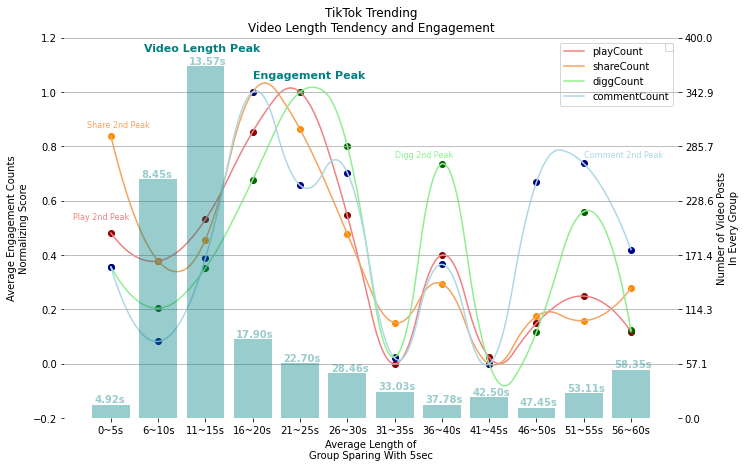

In [42]:
# (1) some variable might use for plot
x = ['0~5s','6~10s','11~15s','16~20s','21~25s','26~30s','31~35s','36~40s','41~45s','46~50s','51~55s','56~60s']
x_average = ['4.92s', '8.45s', '13.57s', '17.90s',
             '22.70s', '28.46s', '33.03s', '37.78s',
             '42.50s', '47.45s', '53.11s', '58.35s']
x_pos = [0,1,2,3,4,5,6,7,8,9,10,11]
label = ['playCount','shareCount','diggCount','commentCount', 'video counts & average length']

# (2) preset
##create figure
fig = plt.figure(figsize=(11, 7))

# (3) line plot
##create plot
ax = fig.add_subplot(111)

plt.scatter(x, df_mean['playCount'], c='darkred')
param = np.linspace(0, 1, len(x))
spl = make_interp_spline(param, np.c_[x_pos,df_mean['playCount']], k=2)
xnew, y_smooth = spl(np.linspace(0, 1, len(x) * 100)).T
plt.plot(xnew, y_smooth, c= 'lightcoral', label=label[0])

plt.scatter(x, df_mean['shareCount'], c='darkorange')
param = np.linspace(0, 1, len(x))
spl = make_interp_spline(param, np.c_[x_pos,df_mean['shareCount']], k=2)
xnew, y_smooth = spl(np.linspace(0, 1, len(x) * 100)).T
plt.plot(xnew, y_smooth, c= 'sandybrown', label=label[1])

plt.scatter(x, df_mean['diggCount'], c='darkgreen')
param = np.linspace(0, 1, len(x))
spl = make_interp_spline(param, np.c_[x_pos,df_mean['diggCount']], k=2)
xnew, y_smooth = spl(np.linspace(0, 1, len(x) * 100)).T
plt.plot(xnew, y_smooth, c= 'lightgreen', label=label[2])

plt.scatter(x, df_mean['commentCount'], c='darkblue')
param = np.linspace(0, 1, len(x))
spl = make_interp_spline(param, np.c_[x_pos,df_mean['commentCount']], k=2)
xnew, y_smooth = spl(np.linspace(0, 1, len(x) * 100)).T
plt.plot(xnew, y_smooth, c= 'lightblue', label=label[3])

## aest
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

## axes
### Peak annotate
ax.annotate("Engagement Peak", xy=(3,1.05), xytext=(3,1.05), weight='bold',
            size = 11 , color="Teal", ) #arrowprops=dict(arrowstyle='->',fc="black", ec="black", alpha=0.2)
ax.annotate("Video Length Peak", xy=(0.7,1.15), xytext=(0.7,1.15), weight='bold',
            size = 11 , color="Teal", )
### 2nd Peak annotate
ax.annotate("Digg 2nd Peak", xy=(6,0.76), xytext=(6,0.76), 
            size = 8 , color="lightgreen", )
ax.annotate("Comment 2nd Peak", xy=(10,0.76), xytext=(10,0.76), 
            size = 8 , color="lightblue", )
ax.annotate("Share 2nd Peak", xy=(-0.5,0.87), xytext=(-0.5,0.87), 
            size = 8 , color="sandybrown", )
ax.annotate("Play 2nd Peak", xy=(-0.8,0.87), xytext=(-0.8,0.53), 
            size = 8 , color="lightcoral", )
### other axes
plt.title("TikTok Trending\nVideo Length Tendency and Engagement")
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(axs.get_yticks())))
ax.set_xlabel('Average Length of\nGroup Sparing With 5sec')
ax.set_ylabel('Average Engagement Counts\nNormalizing Score')
ax.set_xticks(x)



# (3) bar plots: econdary ax
axs = ax.twinx()
axs.bar(x, group_count, color='Teal' , alpha=0.4, zorder=2, ) #label=label[4]

## aest
axs.spines['right'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.spines['bottom'].set_visible(False)

## axes
axs.set_yticks(np.linspace(axs.get_yticks()[0], axs.get_yticks()[-1], len(ax.get_yticks())))
axs.set_ylabel('Number of Video Posts\nIn Every Group')
for i, v in enumerate(group_count):
    axs.text(x_pos[i] - 0.35, v + 2, x_average[i], color='Teal', fontweight='bold',alpha=0.4, zorder=2)



# (4) show plot
ax.legend()
axs.legend()
plt.grid()
plt.show()

# Check why 36~40s does have a peak

In [273]:
df_engage_clean2[df_engage_clean2['group']=='8']

,diggCount,shareCount,playCount,commentCount,video_duration,group
887,309900,4888,1500000,2003,36,8
928,157700,386,821200,1314,39,8
359,20600,240,558900,87,37,8
226,19700,204,83100,539,37,8
954,9490,758,383600,134,37,8
552,9129,59,54500,231,39,8
70,7508,18,58500,17,37,8
106,7070,63,97900,222,40,8
779,6858,48,78500,169,36,8
216,5845,14,117500,112,39,8
